In [2]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [3]:
def psi(g,e):
    return np.array([g, e])

#def pulse(t, Omega0, delPrime):
#    Omega = np.sqrt(Omega0**2 + delPrime**2)
#    
#    return np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
#             [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])

def pulse(t, Omega0, delta, phi0, phi1):
    Omega = np.sqrt(Omega0**2 + delta**2)
    
    if Omega == 0.0:
        U = np.array([[1.0 , 0.0],
                      [0.0 , 1.0]])
        
    else:
        U = np.array([[np.cos(Omega*t/2.0) -(1.0j*delta/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
                     [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delta/Omega)*np.sin(Omega*t/2.0)]])
    
    V1 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(-1.0j*phi1)]])
    
    V0 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(1.0j*phi0)]])
    
    return np.exp(1.0j*delta*t/2.0)*V1@U@V0

def rhoee(psi):
    return (abs(psi[1]))**2.0

def rhogg(psi):
    return (abs(psi[0]))**2.0

def phi(psi):
    phi0 = math.atan2(np.real(psi[0]),np.imag(psi[0]))
    phi1 = math.atan2(np.real(psi[1]),np.imag(psi[1]))
    return (phi0-phi1)

def blochVec(psi):
    w = rhogg(psi) - rhoee(psi)  #pointed up is ground state
    if abs(w)>1.0:
        w = float(round(w))
    x = np.sin(np.arccos(w))*np.cos(phi(psi))
    y = np.sin(np.arccos(w))*np.sin(phi(psi))
    return np.array([x,y,w])

def ramsey(psi0, t, delta, delPrime, Omega0):
    #psi0 = initial state vector
    #t = dark time
    #delta = dark time detuning
    #delprime = pulse detuning
    #Omega0 = rabi freq.
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    
    return pi2Pulse@freeEvo@pi2Pulse@psi0

def ramseyInjP(psi0, t, delta, delPrime, Omega0):
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) 
    
    return pi2Pulse@freeEvo@pi2PhaseInj@pi2Pulse@psi0

def ramseyInjM(psi0, t, delta, delPrime, Omega0):
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0) 
    
    return pi2Pulse@freeEvo@pi2PhaseInj@pi2Pulse@psi0

Ramsey sequence with pulse detuning, 0 dark time (or otherwise 0 dark time detuning, ie no phase is accumulated during the dark time) and a $\pi/2$ phase injection.

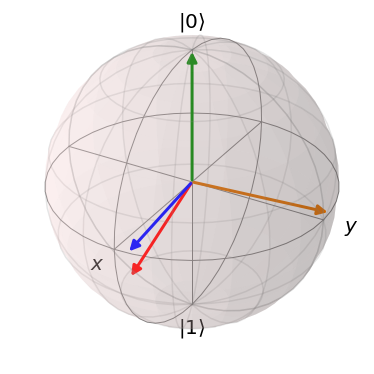

-0.19857003566369452

In [4]:
delta = 0.1
pi2Pulse = pulse(np.pi/2.0, 1.0, delta, 0.0, 0.0)    #imperfect pi/2 pulse
pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) #def pulse(t, Omega0, delta, phi0, phi1):

psi0 = psi(1.0, 0.0)                #start in the ground state
psi1 = pi2Pulse@psi0                #bring to mixed state
psi2 = pi2PhaseInj@psi1                 #let phase accumulate
psi3 = pi2Pulse@psi2                #apply another pi/2 pulse

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi2))
b.add_vectors(blochVec(psi3))     #psi3 = psi0 as expected.
b.show()
blochVec(psi3)[2]

Now the same thing with a $-\pi/2$ phase injection

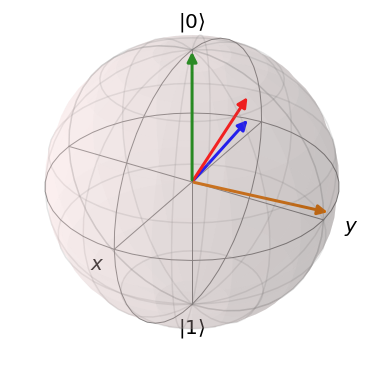

0.19857923079916417

In [5]:
delta = 0.1
pi2Pulse = pulse(np.pi/2.0, 1.0, delta, 0.0, 0.0)    #imperfect pi/2 pulse
pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0) #def pulse(t, Omega0, delta, phi0, phi1):

psi0 = psi(1.0, 0.0)                #start in the ground state
psi1 = pi2Pulse@psi0                #bring to mixed state
psi2 = pi2PhaseInj@psi1             #let phase accumulate
psi3 = pi2Pulse@psi2                #apply another pi/2 pulse

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi2))
b.add_vectors(blochVec(psi3))
b.show()
blochVec(psi3)[2]

Two ramsey sequences (one with $+\pi/2$ phase jump the other with $-\pi/2$) with no dark time detuning.

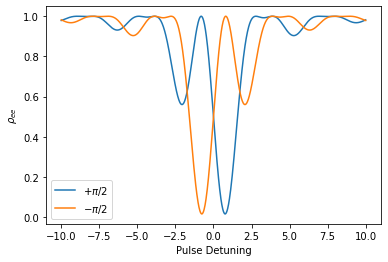

In [6]:
psi0 = psi(0.0, 1.0)
pts = 1000
deltas = np.linspace(-10.0, 10.0, pts)
RhoeeP = [0.0]*pts
RhoeeM = [0.0]*pts
dif = [0.0]*pts
for ii in range(pts):
    RhoeeP[ii] = rhoee(ramseyInjP(psi0, 1.0, 0.0, deltas[ii], 1.0))
    RhoeeM[ii] = rhoee(ramseyInjM(psi0, 1.0, 0.0, deltas[ii], 1.0))
    dif[ii] = RhoeeP[ii] - RhoeeM[ii]
plt.plot(deltas, RhoeeP, label = "$+\pi/2$")
plt.plot(deltas, RhoeeM, label = "$-\pi/2$")
plt.xlabel('Pulse Detuning')
plt.ylabel(r'$\rho_{ee}$')
plt.legend()
plt.show()

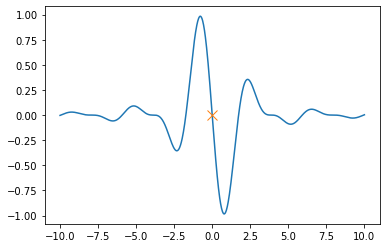

In [7]:
plt.plot(deltas, dif)
plt.plot([0.0], [0.0], marker="x", markerfacecolor="red", markersize=10)
plt.show()

Now the same thing but with dark time detuning. The crossing point of the two fringes (when the difference is 0) will have moved to the left.

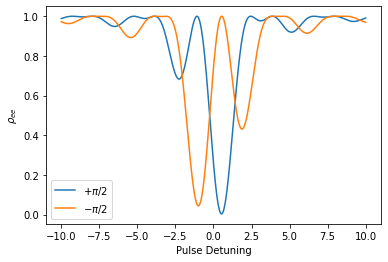

In [8]:
psi0 = psi(0.0, 1.0)
t = 1.0
pts = 1000
delPrimes = np.linspace(-10.0, 10.0, pts)
delta = 0.5
RhoeeP = [0.0]*pts
RhoeeM = [0.0]*pts
dif = [0.0]*pts
for ii in range(pts):
    RhoeeP[ii] = rhoee(ramseyInjP(psi0, t, delta, delPrimes[ii], 1.0))
    RhoeeM[ii] = rhoee(ramseyInjM(psi0, t, delta, delPrimes[ii], 1.0))
    dif[ii] = RhoeeP[ii] - RhoeeM[ii]
plt.plot(deltas, RhoeeP, label = "$+\pi/2$")
plt.plot(deltas, RhoeeM, label = "$-\pi/2$")
plt.xlabel('Pulse Detuning')
plt.ylabel(r'$\rho_{ee}$')
plt.legend()
plt.show()

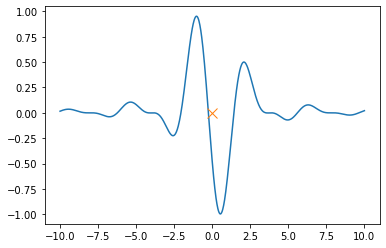

In [9]:
plt.plot(deltas, dif)
plt.plot([0.0], [0.0], marker="x", markerfacecolor="red", markersize=10)
plt.show()

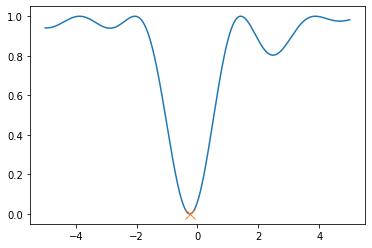

In [10]:
psi0 = psi(0.0, 1.0)
t = 1.0
Omega0 = 1.0
pts = 10000
delPrimes = np.linspace(-5.0, 5.0, pts)
delta = 0.5
Rhoee = [0.0]*pts
for ii in range(pts):
    Rhoee[ii] = rhoee(ramsey(psi0, t, delta, delPrimes[ii], Omega0))
plt.plot(delPrimes, Rhoee)
plt.plot(delPrimes[np.argmin(Rhoee)], np.min(Rhoee), marker="x", markerfacecolor="red", markersize=10)

In [11]:
def clockShift(psi0, t, delta, Omega0):
    pts = 1000
    delPrimes = np.linspace(-2.0, 2.0, pts)
    Rhoee = [0.0]*pts
    for ii in range(pts):
        Rhoee[ii] = rhoee(ramsey(psi0, t, delta, delPrimes[ii], Omega0))
    return delPrimes[np.argmin(Rhoee)]

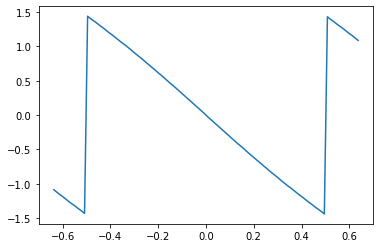

In [12]:
psi0 = psi(0.0, 1.0)
t = 20.0
Omega0 = 1.0
pts = 100
deltas = np.linspace(-0.2, 0.2, pts)
shifts = [0.0]*pts
for ii in range(pts):
    shifts[ii] = clockShift(psi0, t, deltas[ii], Omega0)
plt.plot(deltas*10.0/np.pi, shifts)

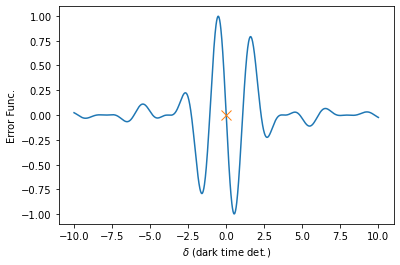

In [14]:
psi0 = psi(0.0, 1.0)
pts = 1000
delPrime = 0.0
deltas = np.linspace(-10.0, 10.0, pts)
RhoeeP = [0.0]*pts
RhoeeM = [0.0]*pts
dif = [0.0]*pts
for ii in range(pts):
    RhoeeP[ii] = rhoee(ramseyInjP(psi0, 1.0, deltas[ii], delPrime + deltas[ii], 1.0))
    RhoeeM[ii] = rhoee(ramseyInjM(psi0, 1.0, deltas[ii], delPrime + deltas[ii], 1.0))
    dif[ii] = RhoeeP[ii] - RhoeeM[ii]
plt.plot(deltas, dif)
plt.xlabel('$\delta$ (dark time det.)')
plt.ylabel('Error Func.')
plt.plot([0.0], [0.0], marker="x", markerfacecolor="red", markersize=10)
plt.show()

#plt.plot(deltas, RhoeeP, label = "$+\pi/2$")
#plt.plot(deltas, RhoeeM, label = "$-\pi/2$")
#plt.xlabel('Pulse Detuning')
#plt.ylabel(r'$\rho_{ee}$')
#plt.legend()
#plt.show()